<a href="https://colab.research.google.com/github/ignvcio42/IA-TAREAS/blob/main/T1_IA_ignacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 IA


# 1. **ENUNCIADO PARTE 1**

---


En la primera parte de esta tarea, abordaremos el análisis de una red bayesiana aplicada a un conjunto de datos relacionados con un conjunto de datos de indicadores de salud de enfermedades cardíacas. En este contexto, el objetivo principal es emplear la estructura de la red bayesiana para realizar predicciones significativas y extraer información relevante a partir de las características de cada enfermedad en el dataset.
A continuacion instalaremos las bibliotecas necesarias para la ejecucion y la carga del dataset llamado Heart Disease Health Indicators Dataset.

Gracias a estos datos se puede hacer predicciónes de enfermedades cardíacas en función de múltiples factores, ya sea edad, genero, si es fumador, etc.




In [ ]:
!pip install bnlearn -q
!pip install pandas -q
!pip install kaggle -q

A continuacion, cargaremos el el dataset de las enfermedades, cabe recalcar que esta en formato csv.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Colab Notebooks/KaggleApiCredentials'

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset
!ls

/content/gdrive/MyDrive/Colab Notebooks/dataset
heart_disease_health_indicators_BRFSS2015.csv
heart_disease_health_indicators_BRFSS2015.gsheet
heart-disease-health-indicators-dataset.zip
imdb-top-10000-movies-updated-august-2023.zip
movies.csv


Luego descargamos el dataset de la siguiente manera:


```
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset
!unzip heart-disease-health-indicators-dataset.zip
```



In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset
!ls

/content/gdrive/MyDrive/Colab Notebooks/dataset
heart_disease_health_indicators_BRFSS2015.csv
heart_disease_health_indicators_BRFSS2015.gsheet
heart-disease-health-indicators-dataset.zip
imdb-top-10000-movies-updated-august-2023.zip
movies.csv




---

**PARTE 1.1**

Ya con todo el procedimiento de importacion de dataset listo, leemos los datos

In [ ]:
import pandas as pd
dataset = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
#print(dataset.head(10))
print(dataset)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0     

Seleccionamos las columnas a nuestra conveniencia, con 253680 filas.

In [ ]:
dt = dataset[['HeartDiseaseorAttack','HighBP','HighChol','CholCheck','Smoker','Sex']];
print(dt)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  Smoker  Sex
0                        0.0     1.0       1.0        1.0     1.0  0.0
1                        0.0     0.0       0.0        0.0     1.0  0.0
2                        0.0     1.0       1.0        1.0     0.0  0.0
3                        0.0     1.0       0.0        1.0     0.0  0.0
4                        0.0     1.0       1.0        1.0     0.0  0.0
...                      ...     ...       ...        ...     ...  ...
253675                   0.0     1.0       1.0        1.0     0.0  1.0
253676                   0.0     1.0       1.0        1.0     0.0  0.0
253677                   0.0     0.0       0.0        1.0     0.0  0.0
253678                   0.0     1.0       0.0        1.0     0.0  1.0
253679                   1.0     1.0       1.0        1.0     0.0  0.0

[253680 rows x 6 columns]



Se comienza a aprender la estructura de **la primera red bayesiana** sobre los datos del archivo csv:

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


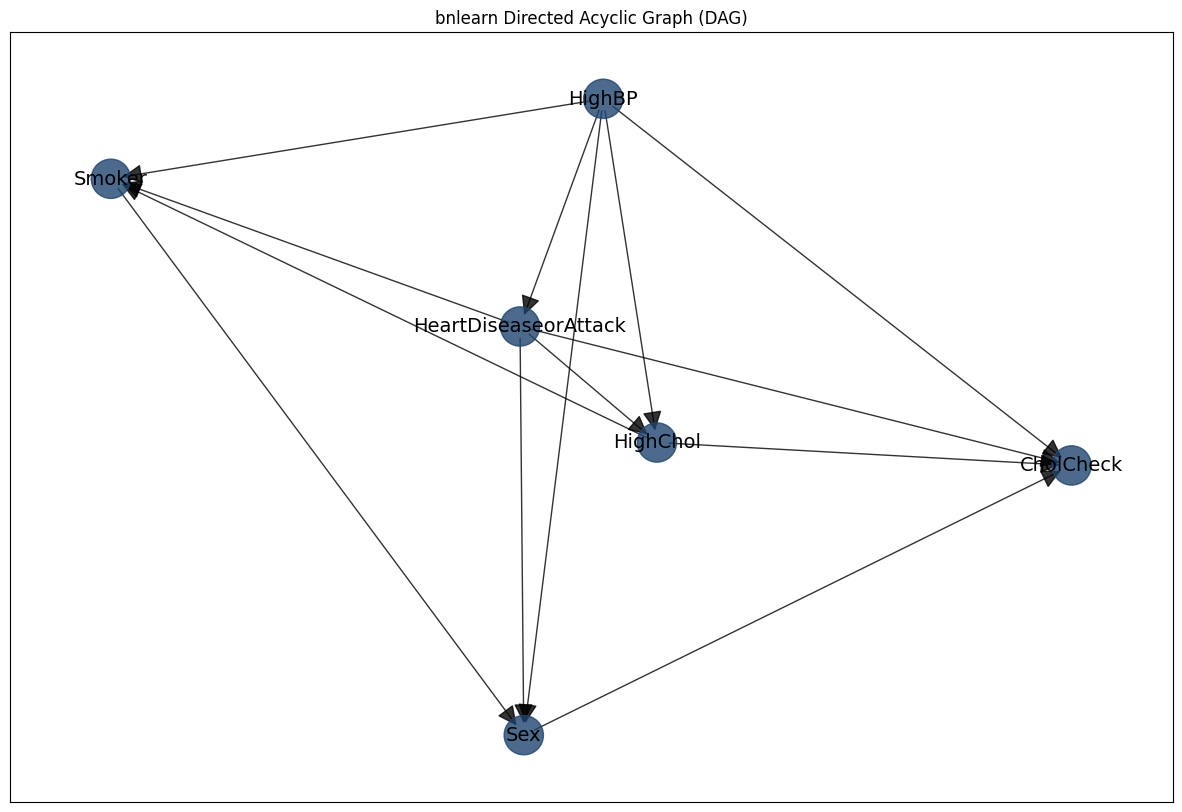

In [ ]:
import bnlearn as bn
#Aprendizaje de la estructura de la red
modelo = bn.structure_learning.fit(dt)
grafico = bn.plot(modelo)

Se parametrizan los parametros que seleccionamos:

In [ ]:
#Caracterizacion de datos
modelo = bn.parameter_learning.fit(modelo,dt,methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of HeartDiseaseorAttack:
+---------------------------+---------------------+---------------------+
| HighBP                    | HighBP(0.0)         | HighBP(1.0)         |
+---------------------------+---------------------+---------------------+
| HeartDiseaseorAttack(0.0) | 0.9572414362474286  | 0.8337312149566903  |
+---------------------------+---------------------+---------------------+
| HeartDiseaseorAttack(1.0) | 0.04275856375257136 | 0.16626878504330964 |
+---------------------------+---------------------+---------------------+
[bnlearn] >CPD of HighChol:
+----------------------+-----+---------------------------+
| HeartDiseaseorAttack | ... | HeartDiseaseorAttack(1.0) |
+----------------------+-----+---------------------------+
| HighBP               | ... | HighBP(1.0) 

---

**PARTE 1.2**

A continuacion se creara **la segunda red bayesiana** utilizando la mitad aleatoria de los datos, seleccionando de manera uniforme.

Para esto se necesitara importar una libreria llamada random.

In [ ]:
import random

Luego se procedera a hacer lo siguiente, con este código, primero se seleccionara aleatoriamente la mitad de los datos originales y luego se aplicara el aprendizaje de la estructura de la red bayesiana a la mitad implementada. El resto del proceso es similar al que se utilizo para la red original (primera red bayesiana).

In [ ]:
import bnlearn as bn

# se obtiene el numero de filas del dataset
num_filas = len(dt)

# Calcula cuantas filas son el 50%
num_muestras = int(num_filas * 0.5)

# Crear una lista de índices aleatorios únicos para seleccionar las filas
indices_aleatorios = random.sample(range(num_filas), num_muestras)

# Seleccionar las filas correspondientes a los índices aleatorios
muestra_mitad = dt.iloc[indices_aleatorios]

print(muestra_mitad)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  Smoker  Sex   Age
182796                   0.0     0.0       1.0        1.0     1.0  0.0  12.0
103206                   0.0     0.0       1.0        1.0     0.0  1.0   2.0
89148                    1.0     1.0       0.0        1.0     1.0  1.0  11.0
68591                    0.0     1.0       1.0        1.0     0.0  1.0  10.0
169865                   0.0     0.0       0.0        1.0     0.0  0.0   4.0
...                      ...     ...       ...        ...     ...  ...   ...
194040                   0.0     1.0       0.0        1.0     1.0  1.0  13.0
165266                   0.0     1.0       1.0        1.0     1.0  1.0  10.0
139797                   0.0     0.0       1.0        1.0     0.0  0.0  11.0
55277                    1.0     0.0       1.0        1.0     0.0  1.0  12.0
2040                     0.0     0.0       1.0        1.0     1.0  0.0   8.0

[126840 rows x 7 columns]



Se comienza a aprender la estructura de **la segunda red bayesiana** sobre los datos del archivo csv:

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


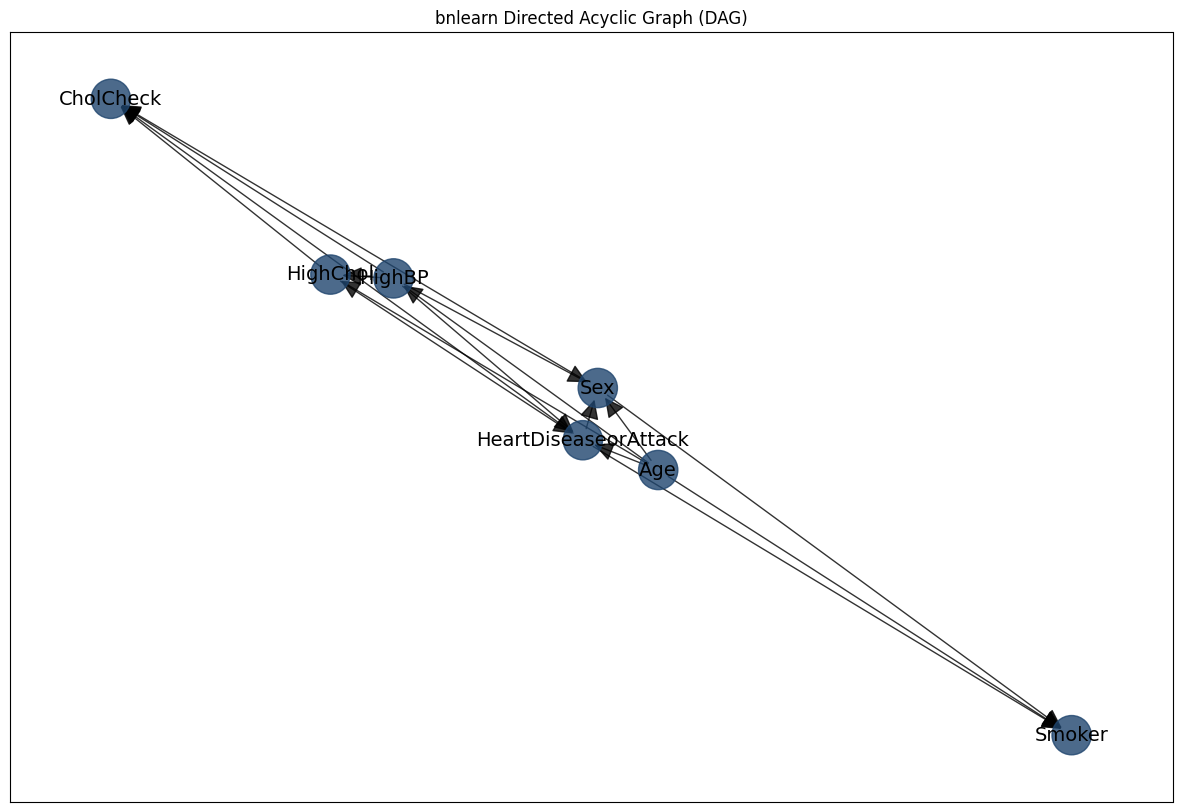

In [ ]:
# Aprendizaje de la estructura de la segunda red bayesiana
modelo_muestra_mitad = bn.structure_learning.fit(muestra_mitad)
grafico_muestra = bn.plot(modelo_muestra_mitad)

Se parametrizan los parametros de la segunda red que seleccionamos:

In [ ]:
# Caracterización de datos para la segunda red bayesiana
modelo_mitad = bn.parameter_learning.fit(modelo_muestra_mitad, dt_muestra, methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of HeartDiseaseorAttack:
+---------------------------+-----+--------------------+
| Age                       | ... | Age(13.0)          |
+---------------------------+-----+--------------------+
| HighBP                    | ... | HighBP(1.0)        |
+---------------------------+-----+--------------------+
| HighChol                  | ... | HighChol(1.0)      |
+---------------------------+-----+--------------------+
| HeartDiseaseorAttack(0.0) | ... | 0.6763844602069369 |
+---------------------------+-----+--------------------+
| HeartDiseaseorAttack(1.0) | ... | 0.323615539793063  |
+---------------------------+-----+--------------------+
[bnlearn] >CPD of CholCheck:
+----------------------+-----+---------------------------+
| HeartDiseaseorAttack | ... | HeartDiseaseorAttack

---

**PARTE 1.3**
Para esta parte de la actividad, se haran 2 consultas para la primera red y las mismas dos consultas para la segunda red bayesiana.


*Primera red bayesiana*

Existen dos consultas de inferencia que se relacionan con obtener las probabilidades de tener enfermedades cardiacas segun el indicador de salud:

1.   Consulta 1: Se hara la predicción de riesgo de enfermedad cardíaca según factores de riesgo, alta presión arterial (HighBP), alto colesterol (HighChol), hábito de fumar (Smoker) y género (hombre)
2.   Consulta 2: Se hara la prediccion de que una persona tenga niveles elevados de colesterol (HighChol) si es fumadora (Smoker) y no se ha realizado un control de colesterol (CholCheck) recientemente






In [ ]:
# Consulta 1: Probabilidad de enfermedad cardíaca dadas variables de riesgo
consulta1 = bn.inference.fit(modelo, variables=["HeartDiseaseorAttack"], evidence={"HighBP": 1.0, "HighChol": 1.0, "Smoker": 1.0, "Sex": 1.0})

# Consulta 2: Probabilidad de colesterol alto en fumadores sin control de colesterol
consulta2 = bn.inference.fit(modelo, variables=["HighChol"], evidence={"Smoker": 1.0, "CholCheck": 0.0})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------------------+----------+
|    |   HeartDiseaseorAttack |        p |
+====+========================+==========+
|  0 |                      0 | 0.704458 |
+----+------------------------+----------+
|  1 |                      1 | 0.295542 |
+----+------------------------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   HighChol |        p |
+====+============+==========+
|  0 |          0 | 0.738628 |
+----+------------+----------+
|  1 |          1 | 0.261372 |
+----+------------+----------+


***Segunda red bayesiana (modelo dividido en dos)***

 Se aplicaran las mismas dos consultas de inferencia que se relacionan con obtener las probabilidades de tener enfermedades cardiacas segun el indicador de salud:


1.   Consulta 1: Se hara la predicción de riesgo de enfermedad cardíaca según factores de riesgo, alta presión arterial (HighBP), alto colesterol (HighChol), hábito de fumar (Smoker) y género (hombre)
2.   Consulta 2: Se hara la prediccion de que una persona tenga niveles elevados de colesterol (HighChol) si es fumadora (Smoker) y no se ha realizado un control de colesterol (CholCheck) recientemente


In [ ]:
# Consulta 1: Probabilidad de enfermedad cardíaca dadas variables de riesgo
consulta3 = bn.inference.fit(modelo_mitad, variables=["HeartDiseaseorAttack"], evidence={"HighBP": 1.0, "HighChol": 1.0, "Smoker": 1.0, "Sex": 1.0})

# Consulta 2: Probabilidad de colesterol alto en fumadores sin control de colesterol
consulta4 = bn.inference.fit(modelo_mitad, variables=["HighChol"], evidence={"Smoker": 1.0, "CholCheck": 0.0})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------------------+----------+
|    |   HeartDiseaseorAttack |        p |
+====+========================+==========+
|  0 |                      0 | 0.686614 |
+----+------------------------+----------+
|  1 |                      1 | 0.313386 |
+----+------------------------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+---------+
|    |   HighChol |       p |
+====+============+=========+
|  0 |          0 | 0.74123 |
+----+------------+---------+
|  1 |          1 | 0.25877 |
+----+------------+---------+


COMPARACION DE AMBAS SALIDAS

Las salidas de ambas redes bayesianas muestran diferencias notables en las probabilidades calculadas. En la red bayesiana construida con todos los datos, la probabilidad de enfermedad cardíaca (HeartDiseaseorAttack) es de aproximadamente 29.55% cuando se consideran factores como presión arterial alta (HighBP), colesterol alto (HighChol), tabaquismo (Smoker) y género (Sex). Además, la probabilidad de colesterol alto (HighChol) en fumadores sin control de colesterol (CholCheck) es de aproximadamente 26.14%

Por otro lado, en la red bayesiana construida con la mitad aleatoria de los datos, estas probabilidades varían ligeramente, con una probabilidad de enfermedad cardíaca del 31.34% y una probabilidad de colesterol alto en fumadores sin control de colesterol del 25.88%.

Estas diferencias pueden deberse a la reducción del tamaño de la muestra en la segunda red, lo que podría llevar a estimaciones ligeramente diferentes de las probabilidades condicionales. Es importante considerar que la precisión de las estimaciones puede verse afectada por el tamaño de la muestra y la aleatoriedad en la selección de datos.

Además, la aleatoriedad en la selección de datos puede tener una influencia más significativa en los resultados de la segunda red. Es importante considerar que la precisión y estabilidad de las estimaciones pueden disminuir con un conjunto de datos más pequeño.


# ENUNCIADO PARTE 2

**PARTE 2.1**

En esta parte de la tarea, se investigara el comportamiento de una cadena de Markov basada en las preferencias musicales del profesor mientras utiliza el servicio de streaming Spotify. A través de una matriz de transición que describe las probabilidades de cambio de una canción a otra de diferentes grupos musicales, podemos modelar su experiencia musical. Los grupos incluyen una variada selección de bandas de metal, como Helloween, Angra, Stratovarius, Avantasia, Manowar, Liquid Tension Experiment, Blind Guardian y Hammerfall.

El profesor ha notado que su elección de canciones sigue una distribución de probabilidad específica. Esta información nos permite construir una cadena de Markov y realizar lo que se nos pide.

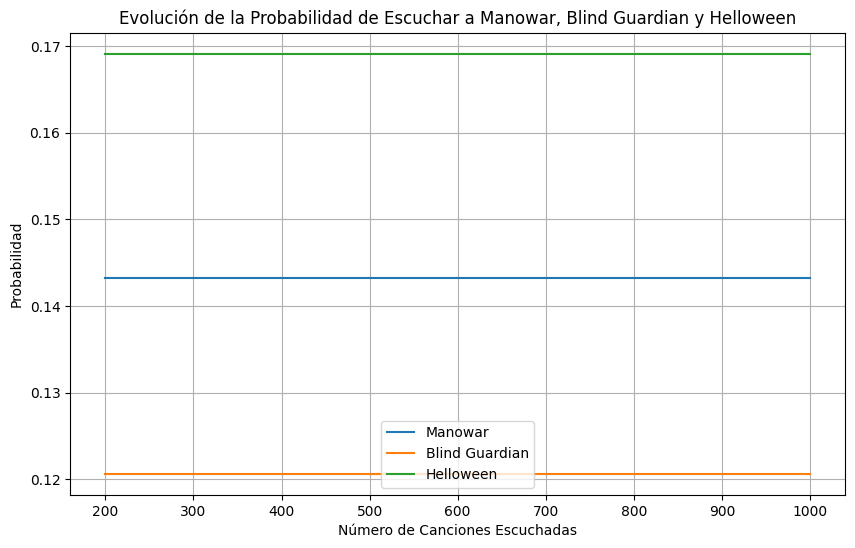

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Bandas = ['Helloween', 'Angra','Stratovarius','Avantasia','Manowar','Liquid Tension Experiment','Blind Guardian', ' Hammerfall']
transicion = np.array([
    [0.27, 0.13, 0.09, 0.02, 0.10, 0.11, 0.15, 0.13],
    [0.17, 0.18, 0.00, 0.15, 0.14, 0.13, 0.12, 0.11],
    [0.15, 0.13, 0.05, 0.07, 0.11, 0.19, 0.19, 0.11],
    [0.19, 0.11, 0.15, 0.15, 0.12, 0.11, 0.12, 0.05],
    [0.11, 0.20, 0.17, 0.14, 0.18, 0.11, 0.07, 0.02],
    [0.07, 0.12, 0.11, 0.12, 0.27, 0.09, 0.03, 0.19],
    [0.15, 0.10, 0.12, 0.08, 0.18, 0.07, 0.14, 0.16],
    [0.21, 0.09, 0.06, 0.13, 0.05, 0.17, 0.08, 0.21]])

# Probabilidad inicial (comienza con Blind Guardian)
probabilidad = np.array([0, 0, 0, 0, 0, 1, 0, 0])

# Número de canciones
num_canciones = [200, 500, 1000]

# Listas para almacenar las probabilidades a lo largo del tiempo
probabilidades_manowar = []
probabilidades_blind_guardian = []
probabilidades_helloween = []

# Calcular las probabilidades a lo largo del tiempo
for _ in range(max(num_canciones)):
    probabilidad = np.dot(probabilidad, transicion)
    if _ + 1 in num_canciones:
        probabilidades_manowar.append(probabilidad[4])
        probabilidades_blind_guardian.append(probabilidad[5])
        probabilidades_helloween.append(probabilidad[0])

# Graficar las probabilidades
plt.figure(figsize=(10, 6))
plt.plot(num_canciones, probabilidades_manowar, label="Manowar")
plt.plot(num_canciones, probabilidades_blind_guardian, label="Blind Guardian")
plt.plot(num_canciones, probabilidades_helloween, label="Helloween")
plt.xlabel("Número de Canciones Escuchadas")
plt.ylabel("Probabilidad")
plt.title("Evolución de la Probabilidad de Escuchar a Manowar, Blind Guardian y Helloween")
plt.legend()
plt.grid(True)
plt.show()

El gráfico representa la evolución de las probabilidades de que el profesor esté escuchando canciones de tres grupos musicales específicos: Manowar, Blind Guardian y Helloween, a medida que sigue escuchando música en Spotify. El eje x del gráfico muestra el número de canciones escuchadas, mientras que el eje y representa las probabilidades.

Comenzando con Blind Guardian, las probabilidades se estabilizan con el tiempo, mostrando una tendencia hacia una mayor diversificación en las preferencias musicales, con un aumento en la probabilidad de escuchar a Manowar y Helloween en comparación con el inicio. Por ende, el profesor tiende a explorar más grupos musicales además de su elección inicial, revelando una evolución en sus gustos musicales durante su experiencia en Spotify.


---



In [ ]:
def random_walk(inicio, iteraciones, transicion):
    contador = [0, 0, 0, 0, 0, 0, 0 ,0]
    camino = [inicio]
    i = inicio
    for _ in range(iteraciones):
        i = np.random.choice(8, p=transicion[i])
        contador[i] += 1
        camino.append(i)

    prob = []
    for j in range(7):
        division = contador[j] / iteraciones
        prob.append(division)

    for k in range(7):
      print("la probabilidad de escuchar la cancion " + Bandas[k] + " es : " + str(prob[k]) + " tras " + str(iteraciones) + " iteraciones \n")
    #print(prob)
    print(camino)
    print(len(camino))

Este código simula una caminata aleatoria con un conjunto de 8 elementos, representando la probabilidad de escuchar canciones. Comienza en una posición inicial, realiza un número especificado de iteraciones y registra las visitas a cada elemento. Luego, calcula y muestra las probabilidades de escuchar cada canción después de las iteraciones dadas, junto con el camino seguido en la caminata aleatoria. Este proceso se repite para valores de iteraciones de 200, 500 y 1000, permitiendo analizar cómo cambian las probabilidades de escucha a medida que aumenta el número de pasos en la caminata aleatoria.

In [ ]:
random_walk(0, 200, transicion)

la probabilidad de escuchar la cancion Helloween es : 0.205 tras 200 iteraciones 

la probabilidad de escuchar la cancion Angra es : 0.135 tras 200 iteraciones 

la probabilidad de escuchar la cancion Stratovarius es : 0.11 tras 200 iteraciones 

la probabilidad de escuchar la cancion Avantasia es : 0.09 tras 200 iteraciones 

la probabilidad de escuchar la cancion Manowar es : 0.14 tras 200 iteraciones 

la probabilidad de escuchar la cancion Liquid Tension Experiment es : 0.14 tras 200 iteraciones 

la probabilidad de escuchar la cancion Blind Guardian es : 0.065 tras 200 iteraciones 

[0, 7, 5, 4, 2, 7, 6, 5, 4, 0, 5, 7, 6, 7, 2, 7, 0, 4, 2, 1, 1, 1, 4, 4, 1, 1, 0, 4, 1, 3, 2, 5, 7, 5, 7, 0, 1, 5, 7, 2, 0, 0, 0, 7, 0, 0, 2, 0, 0, 7, 6, 0, 4, 5, 4, 4, 0, 6, 6, 3, 6, 3, 5, 3, 4, 1, 7, 5, 4, 1, 5, 5, 1, 5, 7, 0, 0, 2, 1, 1, 3, 1, 1, 1, 3, 5, 3, 4, 2, 1, 6, 5, 7, 7, 7, 4, 1, 3, 5, 2, 5, 4, 1, 3, 2, 5, 4, 4, 4, 1, 3, 4, 4, 2, 5, 4, 0, 4, 3, 2, 2, 3, 3, 4, 1, 4, 4, 4, 4, 2, 5, 2, 6, 7, 5,

In [ ]:
random_walk(0, 500, transicion)

la probabilidad de escuchar la cancion Helloween es : 0.194 tras 500 iteraciones 

la probabilidad de escuchar la cancion Angra es : 0.126 tras 500 iteraciones 

la probabilidad de escuchar la cancion Stratovarius es : 0.102 tras 500 iteraciones 

la probabilidad de escuchar la cancion Avantasia es : 0.108 tras 500 iteraciones 

la probabilidad de escuchar la cancion Manowar es : 0.128 tras 500 iteraciones 

la probabilidad de escuchar la cancion Liquid Tension Experiment es : 0.116 tras 500 iteraciones 

la probabilidad de escuchar la cancion Blind Guardian es : 0.12 tras 500 iteraciones 

[0, 5, 7, 6, 4, 1, 4, 2, 6, 1, 6, 7, 5, 0, 6, 2, 5, 4, 3, 6, 2, 5, 4, 3, 2, 5, 5, 5, 7, 7, 5, 3, 0, 0, 0, 5, 1, 7, 1, 6, 3, 6, 1, 7, 0, 1, 1, 0, 0, 0, 7, 7, 4, 3, 0, 0, 5, 4, 1, 0, 1, 0, 7, 1, 1, 4, 3, 0, 0, 0, 0, 1, 1, 5, 4, 4, 1, 5, 4, 0, 7, 4, 3, 2, 5, 7, 5, 3, 6, 6, 4, 1, 6, 2, 5, 6, 0, 0, 1, 7, 0, 0, 7, 7, 3, 0, 6, 7, 5, 7, 7, 5, 2, 5, 7, 0, 0, 0, 7, 3, 3, 1, 1, 4, 0, 7, 3, 1, 3, 5, 7, 0, 6, 6,

In [ ]:
random_walk(0, 1000, transicion)

la probabilidad de escuchar la cancion Helloween es : 0.168 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Angra es : 0.146 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Stratovarius es : 0.097 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Avantasia es : 0.098 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Manowar es : 0.149 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Liquid Tension Experiment es : 0.11 tras 1000 iteraciones 

la probabilidad de escuchar la cancion Blind Guardian es : 0.115 tras 1000 iteraciones 

[0, 7, 6, 3, 6, 7, 3, 3, 3, 5, 2, 6, 2, 5, 1, 6, 7, 6, 1, 5, 7, 7, 4, 4, 1, 1, 4, 5, 5, 4, 1, 6, 6, 4, 4, 1, 6, 6, 2, 6, 7, 7, 1, 6, 2, 0, 1, 1, 4, 5, 4, 2, 1, 7, 1, 0, 1, 7, 6, 0, 0, 6, 0, 0, 0, 5, 7, 1, 0, 6, 0, 6, 4, 3, 3, 0, 5, 4, 2, 1, 1, 0, 6, 2, 4, 2, 6, 1, 1, 0, 5, 2, 6, 2, 0, 0, 7, 3, 5, 5, 4, 4, 4, 1, 6, 6, 0, 1, 6, 4, 2, 4, 1, 4, 4, 2, 0, 1, 3, 5, 3, 5, 2, 1, 1, 6, 4, 3, 4, 4, 5, 3



---


**PARTE 2.2**

Para encontrar el estado estacionario, debemos resolver el sistema de ecuaciones lineales dado por las siguientes ecuaciones:

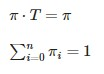

Para continuar, se reescribira la formula de la siguiente manera:

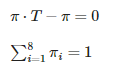

Realizamos una sumatoria hasta 8 debido a que existen 8 bandas en total. Por lo tanto, podemos representar la primera ecuación usando la matriz identidad, y así conseguir despejar el vector de estado de la siguiente forma:

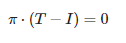

Esto nos da un sistema de 8 ecuaciones lineales, las cuáles son:

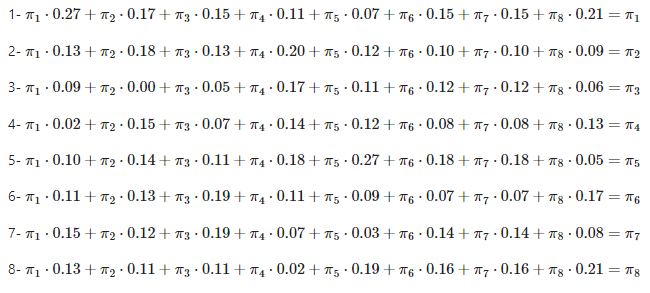

Finalmente, resolvemos este sistema de ecuaciones utilizando numpy, de la siguiente forma:


In [ ]:
I = np.identity(8)
A = transicion - I
constraints = np.ones(8)

# Resolver sistema
pi = np.linalg.solve(A.T, constraints)
pi /= np.sum(pi)
print(f'Vector de estado estacionario: {pi}')
print(f'Suma del vector: {np.sum(pi)}')

Vector de estado estacionario: [0.16912007 0.13528795 0.0939366  0.10524766 0.14322865 0.12065996
 0.11098678 0.12153233]
Suma del vector: 1.0


Comparando los resultados, se obtuvo que son las mismas probabilidades.